In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Q1:　the figure with the y-axis scale from 0 to 4

In [2]:
df1 = pd.read_csv("20201009_nakato_sampledata/E024-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df2 = pd.read_csv("20201009_nakato_sampledata/E058-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df3 = pd.read_csv("20201009_nakato_sampledata/E096-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')

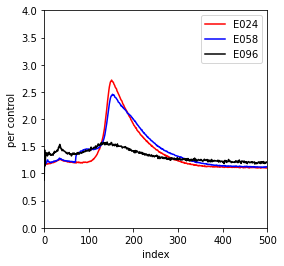

In [3]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.ylim(0,4)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')
plt.savefig("rinkou1.pdf")

Q2: the figure with the x-axis as the logarithmic axis from 0 to 1000000.

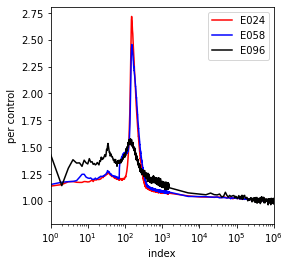

In [6]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xscale("log")
plt.xlim(1,1e6)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')
plt.savefig("rinkou2.pdf")

Q3: Add mean to the Figure

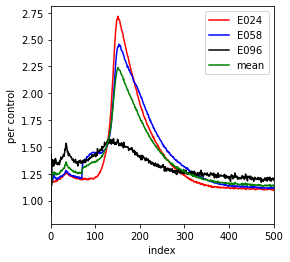

In [9]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.plot(pd.DataFrame([df1["per control"], df2["per control"], df3["per control"]]).mean(), 
         label="mean", color="green")
plt.xlim(0,500)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')
plt.savefig("rinkou3.pdf")

Q4: add figure of Jaccard index

In [10]:
# decide axis range
all_jaccard_index = []
for i in df1, df2, df3:
    add_list = list(i.iloc[:,0])
    all_jaccard_index.extend(add_list)

y0, y1 = min(all_jaccard_index)* .9, max(all_jaccard_index)*1.1

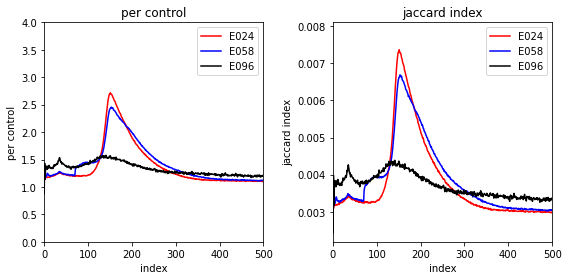

In [11]:
plt.figure(figsize=(8, 4))
# figure of per control
plt.subplot(1,2,1)
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.title("per control")
plt.xlim(0,500)
plt.ylim(0,4)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')

# figure of accard index
plt.subplot(1,2,2)
plt.plot(df1.iloc[:,0], label="E024", color="red")
plt.plot(df2.iloc[:,0], label="E058", color="blue")
plt.plot(df3.iloc[:,0], label="E096", color="black")
plt.title("jaccard index")
plt.xlim(0,500)
plt.ylim(y0,y1)
plt.xlabel("index")
plt.ylabel("jaccard index")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig("rinkou_1009_sakatani.pdf")